![]()
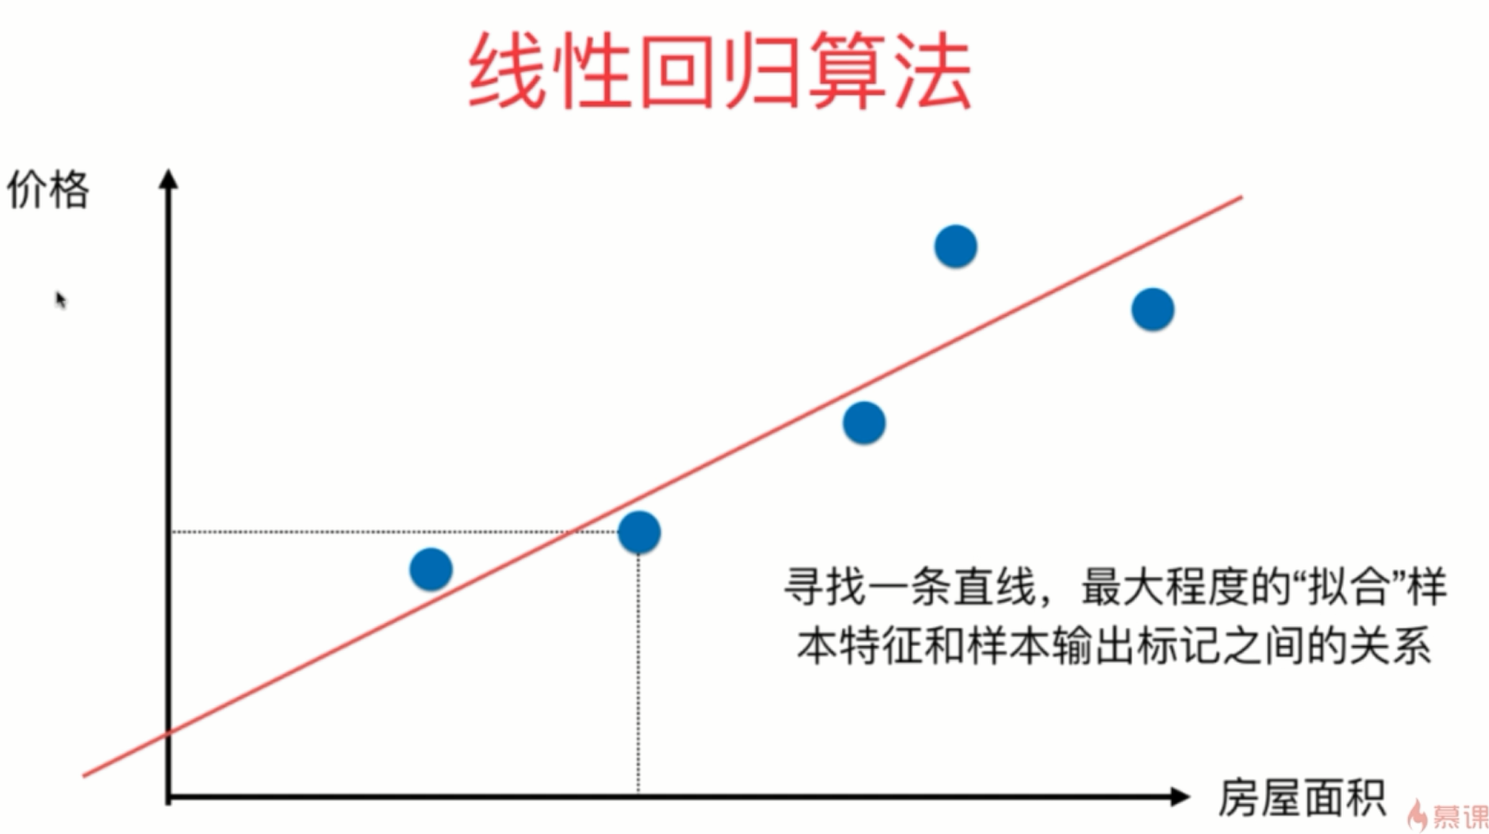


![]()
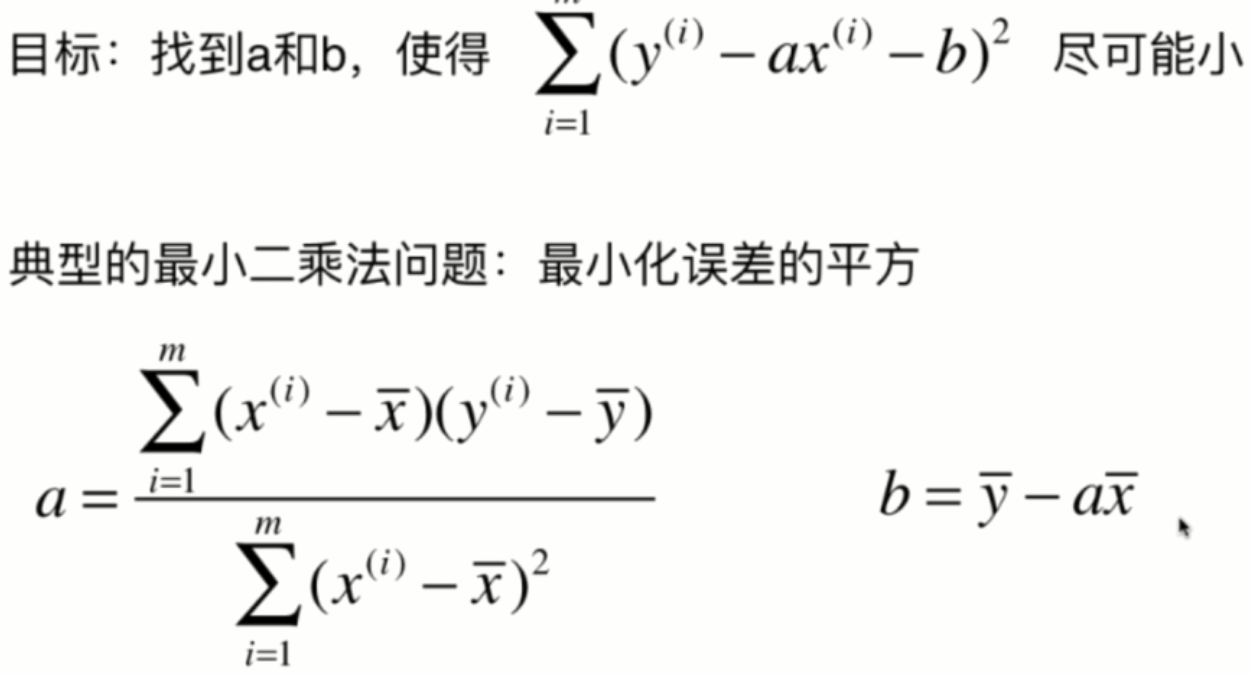

### 简单线性回归

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [2]:
x = np.array([1., 2., 3., 4., 5.])
y = np.array([1., 3., 2., 3., 5.])

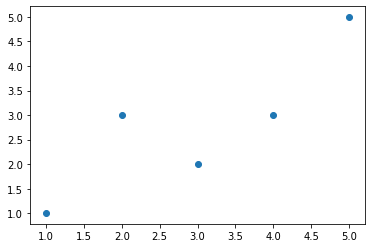

In [3]:
plt.scatter(x , y)
plt.show()

In [4]:
from LR import my_LR   #导入自己写的库

In [5]:
lr = my_LR()
lr. fit(x,y)

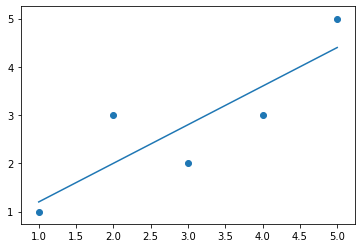

In [6]:
plt.plot(x , lr.predict(x))
plt.scatter(x , y)
plt.show()

In [7]:
lr.predict(9)

7.6

### 衡量回归算法 
(使用波士顿房价数据)

均方误差  MSE

均方根误差 RMSE = sqrt(MSE)      ；     一般考虑用这个

平均绝对误差 MAE

In [1]:
from sklearn import datasets
boston = datasets.load_boston()

In [ ]:
cifa10 = datasets.

In [2]:
x= boston.data[:,5]   #房间数
y = boston.target     

In [3]:
plt.scatter(x,y)
plt.show()

NameError: name 'plt' is not defined

可以看出该数据 y=50 的数据有异常，因为其上限为50，需要去掉这些数据

In [11]:
x =  boston.data[:,5][y<50]
y = boston.target[y<50]

In [6]:
boston.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

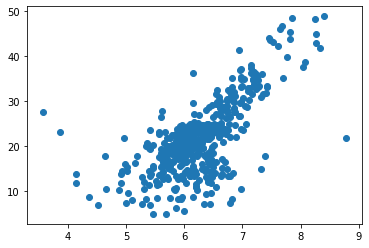

In [12]:
plt.scatter(x,y)
plt.show()

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test  = train_test_split(x , y , random_state = 666)

In [14]:
lr_b = my_LR()
lr_b.fit(X_train,Y_train)

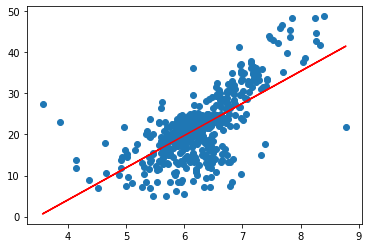

In [15]:
plt.scatter(x,y)
plt.plot(X_train ,lr_b.predict(X_train) ,color = 'r')
plt.show()

In [16]:
lr_b.MSE(Y_test,lr_b.predict(X_test))       #MSE

28.21594936864079

In [17]:
lr_b.RMSE(Y_test,lr_b.predict(X_test))    #RMSE

5.3118687266009115

In [18]:
lr_b.MAE(Y_test,lr_b.predict(X_test))           #MAE

3.9489046062737834

对于不同的应用场景，计算得到的RMSE  MAE的值会有较大的差异，无法用来评判算法的好坏

#### R Squard 指标

对比于基准模型 

R^2 <=1
越接近1越好

当R^2<0说明数据不存在线性关系

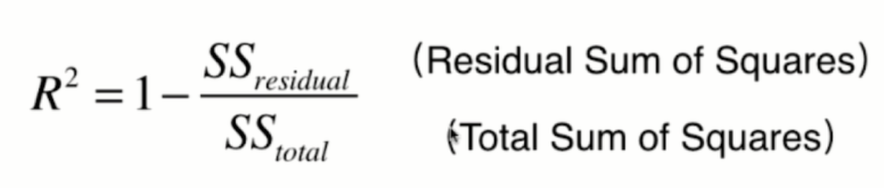

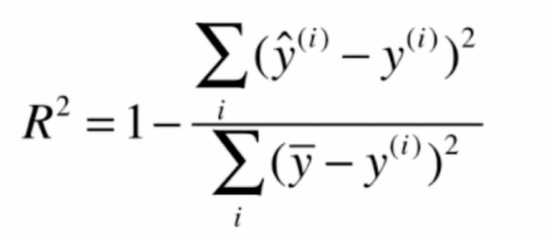

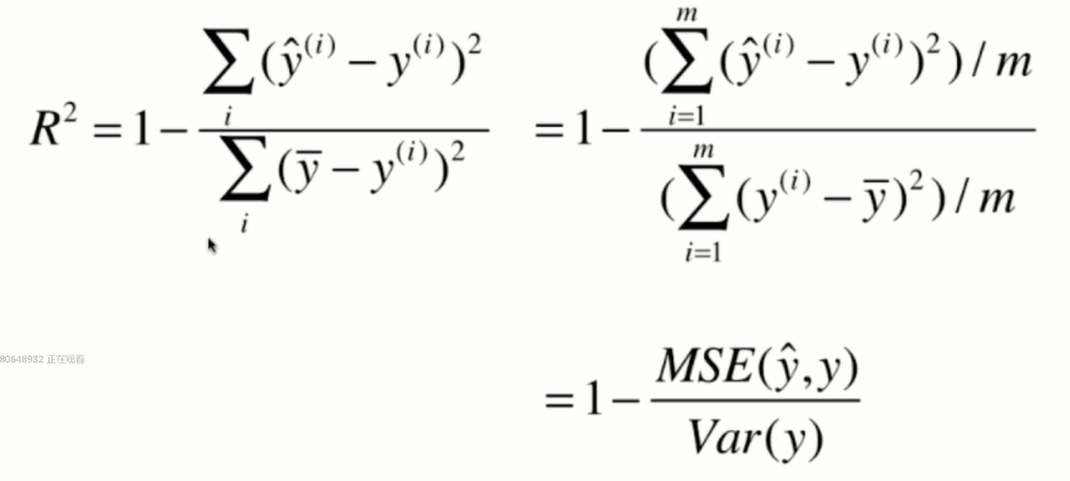

In [19]:
lr_b.R_square(Y_test,lr_b.predict(X_test))

0.5682464825049476

### 多元线性回归

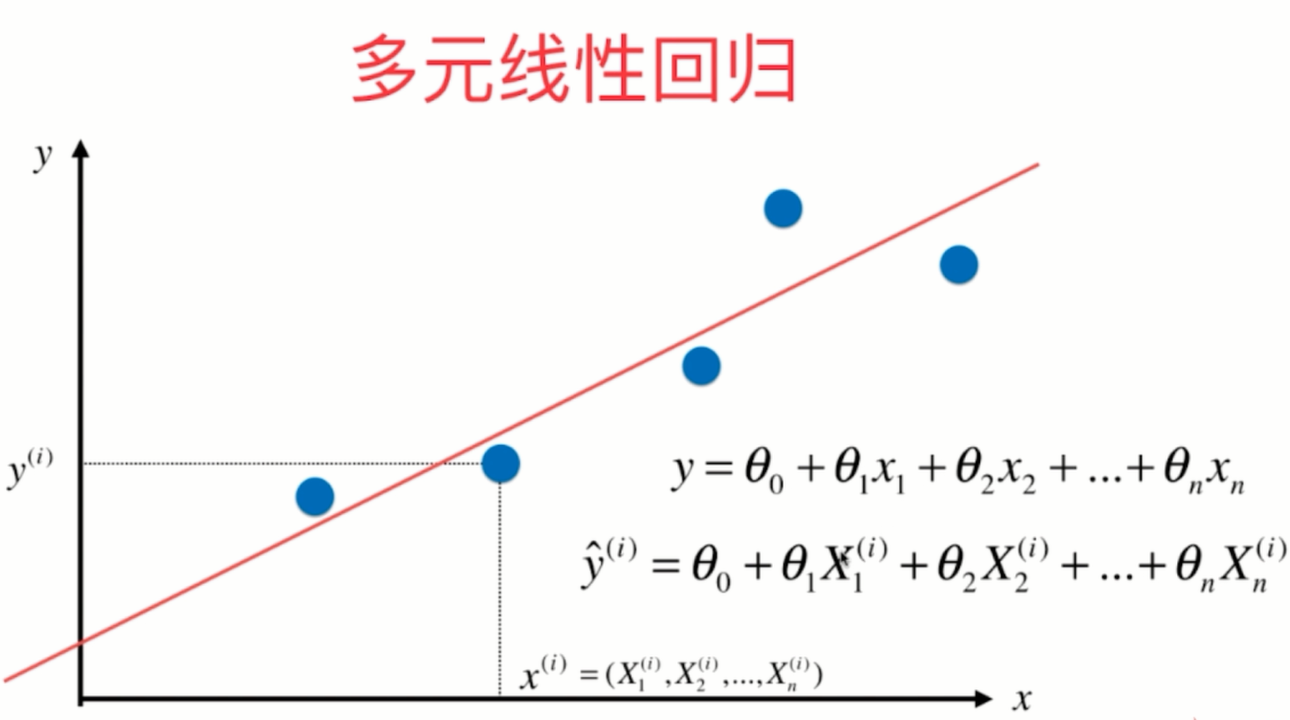

虚构一个恒等于1的特征X0

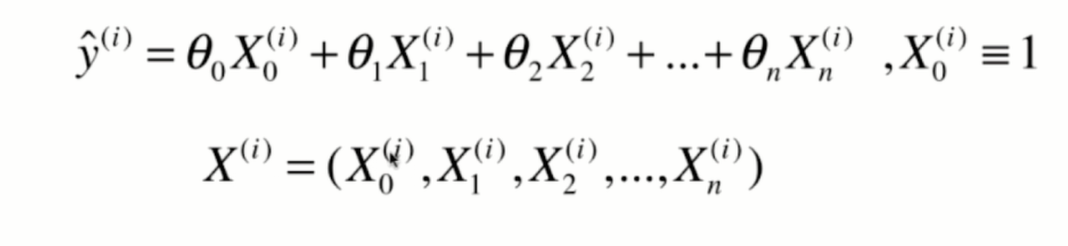

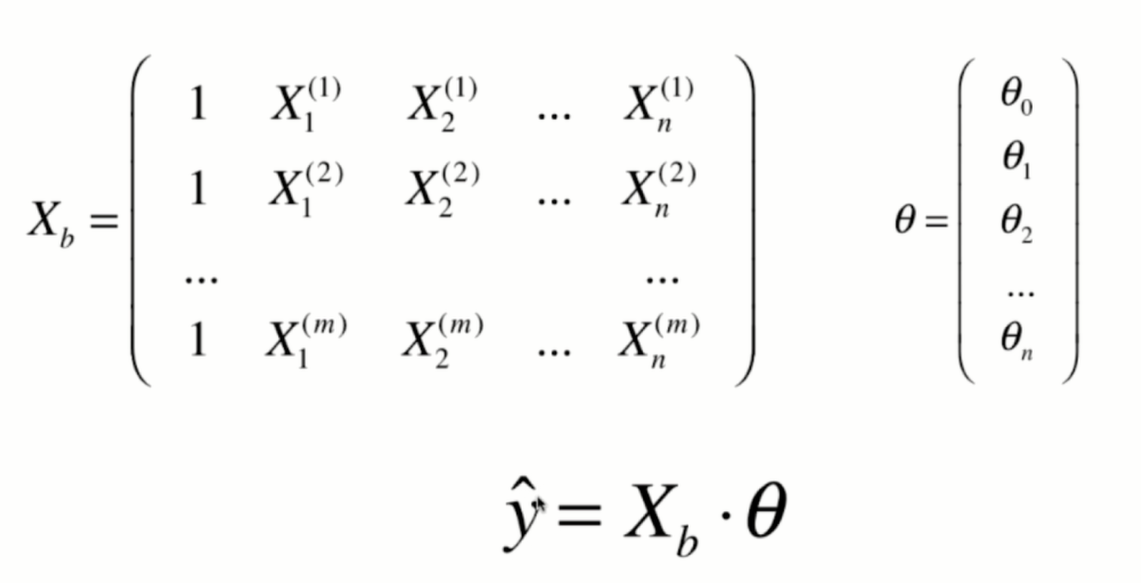

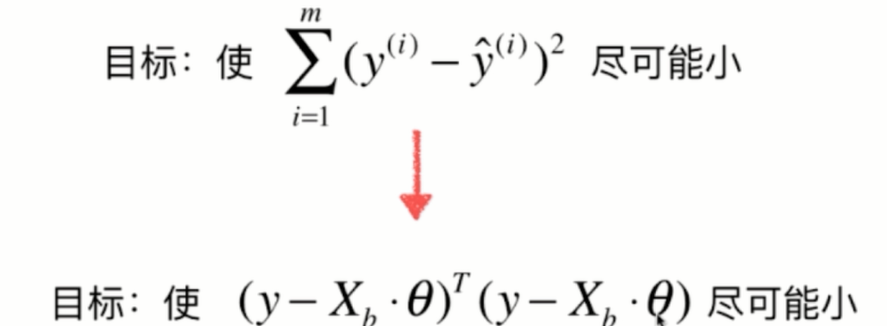

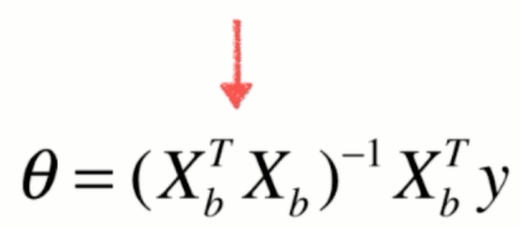

多元线性回归的线性方程解

时间复杂度高，计算量大

不需要对数据解析归一化处理

In [20]:
from sklearn import datasets
boston = datasets.load_boston()

In [21]:
y = boston.target[boston.target<50]
x = boston.data[boston.target<50]

In [22]:
X_train, X_test, Y_train, Y_test  = train_test_split(x , y ,random_state = 666)

In [23]:
lr_m = my_LR()

In [24]:
lr_m.fit_normal(X_train,Y_train)  #获得正规方程解

In [25]:
lr_m.interception_

32.59756158867479

In [26]:
y_predict = lr_m.predict_normal(X_test)  #计算预测值

In [27]:
lr_m.R_square(Y_test,y_predict)

0.8009390227581114

#### sklearn实现

In [28]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

In [29]:
lin_reg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
lin_reg.coef_

array([-1.15625837e-01,  3.13179564e-02, -4.35662825e-02, -9.73281610e-02,
       -1.09500653e+01,  3.49898935e+00, -1.41780625e-02, -1.06249020e+00,
        2.46031503e-01, -1.23291876e-02, -8.79440522e-01,  8.31653623e-03,
       -3.98593455e-01])

In [31]:
lin_reg.intercept_

32.59756158869959

In [32]:
lin_reg.score(X_test,Y_test)

0.8009390227581041

#### KNN Regressor

In [34]:
from sklearn.neighbors import KNeighborsRegressor

knn_reg = KNeighborsRegressor()
knn_reg.fit(X_train,Y_train)
knn_reg.score(X_test,Y_test)

0.602674505080953

网格搜索，调整超参数

In [36]:
param_grid = [
    {
        'weights' : ['uniform'],
        'n_neighbors' : [i for i in range(1,11)]
    },
    
    {
         'weights' : ['distance'],
        'n_neighbors' : [i for i in range(1,11)],
        'p' : [i for i in range(1,6)]
    }
] 

In [37]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(knn_reg , param_grid , n_jobs=-1 , verbose=2)
grid_search.fit(X_train,Y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    1.0s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'weights': ['uniform']},
                         {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'p': [1, 2, 3, 4, 5], 'weights': ['distance']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [40]:
grid_search.best_params_

{'n_neighbors': 6, 'p': 1, 'weights': 'distance'}

In [39]:
grid_search.best_score_

0.6243135119018297

不能因此觉得KNN回归不好，因为他们的score用的标准不一样，KNN用的是交叉验证（CV）

In [42]:
knn_reg = grid_search.best_estimator_
knn_reg.score(X_test,Y_test)

0.7353138117643773

有时间可以将所有超参数进行组合，找最优

### 可解释性

In [43]:
lin_reg.coef_         

array([-1.15625837e-01,  3.13179564e-02, -4.35662825e-02, -9.73281610e-02,
       -1.09500653e+01,  3.49898935e+00, -1.41780625e-02, -1.06249020e+00,
        2.46031503e-01, -1.23291876e-02, -8.79440522e-01,  8.31653623e-03,
       -3.98593455e-01])

对于上述数据，正负表示该特征与价格间是正相关还是负相关

大小表示相关程度

我们就可以进行排序，看看是否合理

In [45]:
mask = np.argsort(lin_reg.coef_)
mask

array([ 4,  7, 10, 12,  0,  3,  2,  6,  9, 11,  1,  8,  5], dtype=int64)

In [46]:
boston.feature_names[mask]

array(['NOX', 'DIS', 'PTRATIO', 'LSTAT', 'CRIM', 'CHAS', 'INDUS', 'AGE',
       'TAX', 'B', 'ZN', 'RAD', 'RM'], dtype='<U7')

In [47]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [34]:
import numpy as np

In [43]:
a = np.array([1,1,1,1])

In [44]:
c=a.copy()

In [45]:
c.sort()

In [46]:
(a==c).all()

True

In [27]:
c=a.sort()

In [28]:
a

array([1, 1, 2, 2, 2, 4, 5, 6])